# Classifying Student Based on Fuzzy Logic
## Pre-processing and Exploring Data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from django.contrib.admin import display
from sklearn.model_selection import train_test_split


In [51]:
# Load the dataset
data = pd.read_csv('data.csv', sep=';')

# Remove tabs and other special characters from column names
data.columns = data.columns.str.replace(r'[\t]', ' ', regex=True)

In [52]:
# Display initial data overview
print("First 5 rows of the dataset:")
display(data.head())
print("Missing values:")
print(data.isnull().sum())
print("Data types:")
print(data.dtypes)


First 5 rows of the dataset:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Missing values:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                              

In [53]:
# Convert 'Target' to categorical
data['Target'] = data['Target'].astype('category')


In [47]:
# Exploratory Data Analysis (EDA)
# Summary statistics
print("Summary statistics:")
display(data.describe())

Summary statistics:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

None

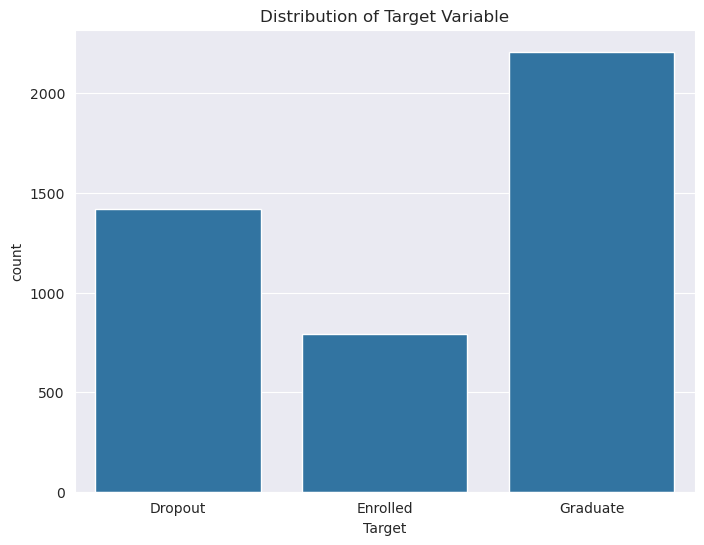

In [54]:
# Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

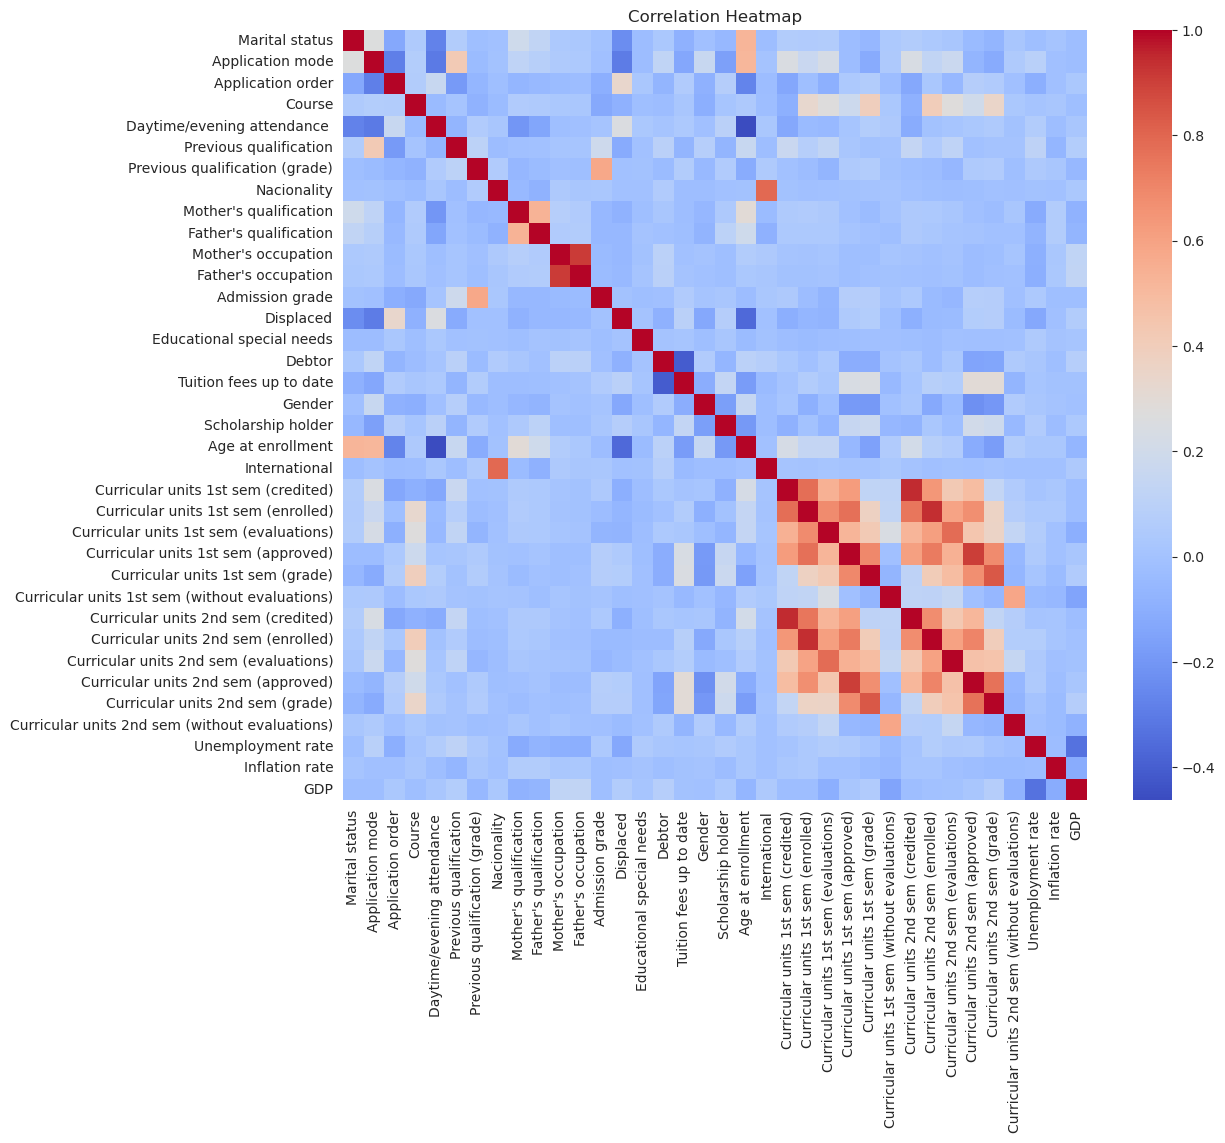

In [55]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show

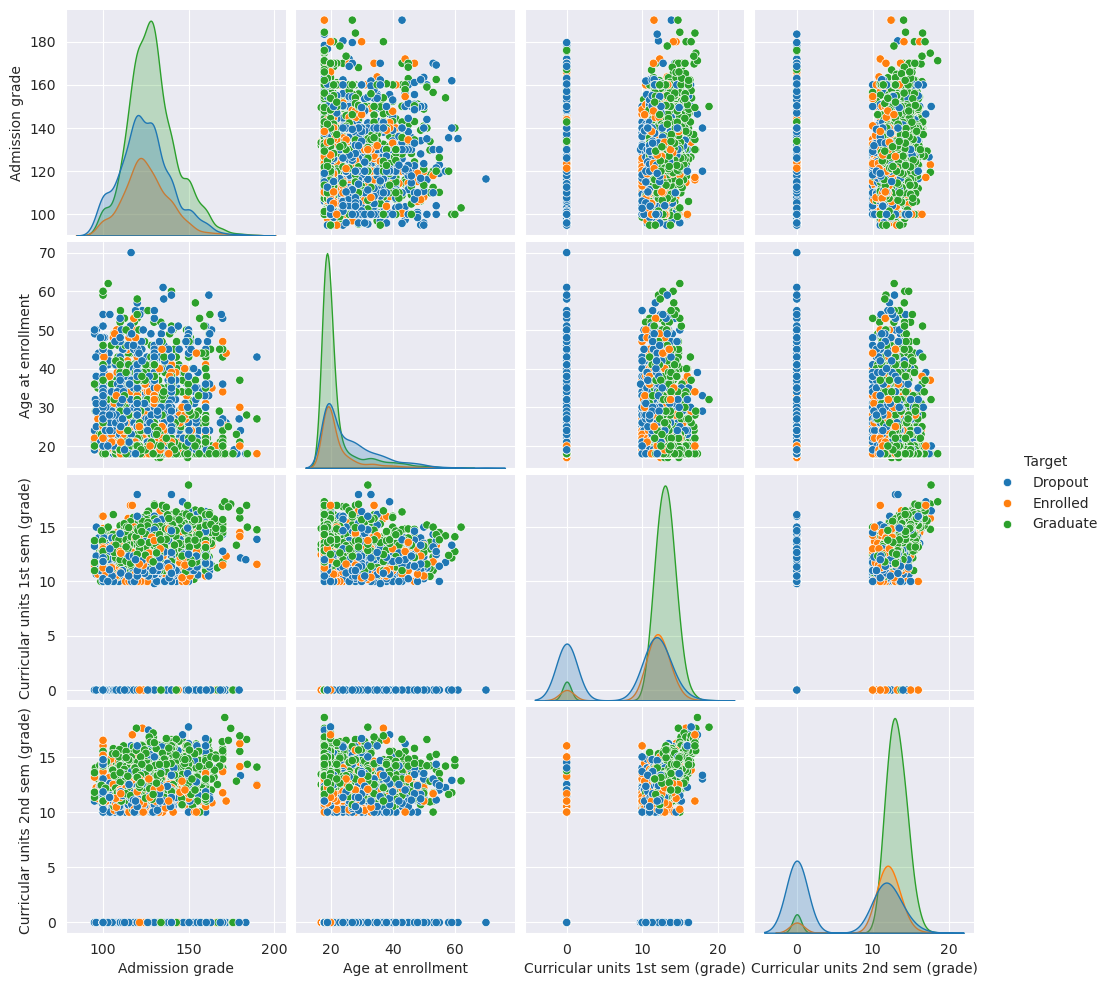

In [56]:
# Pairplot for selected features
selected_features = [
    'Admission grade', 'Age at enrollment',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
]

sns.pairplot(data[selected_features + ['Target']], hue='Target')
plt.show()

In [30]:
# Split dataset into training (80%) and testing (20%)
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:")
display(X_train.shape)
print("Testing set shape:")
display(X_test.shape)

Training set shape:


(3539, 36)

Testing set shape:


(885, 36)

## Fuzzy Feature Representation

In [58]:
# Define triangular membership function
def triangular_membership(x, a, b, c, boundary = None):
    """Calculate membership degree for a triangular function."""
    if boundary == 'left' and x < b or boundary == 'right' and x > b:
            return 1
    elif x <= a or x >= c:
        return 0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x < c:
        return (c - x) / (c - b)
    return 0

In [77]:
meaningful_labels = {
    "Curricular units 1st sem (grade)": ["Poor", "Satisfactory", "Good"],
    "Curricular units 2nd sem (grade)": ["Poor", "Satisfactory", "Good"],
    "Unemployment rate": ["Low", "Moderate", "High"],
    "Inflation rate": ["Negative", "Stable", "High"],
}

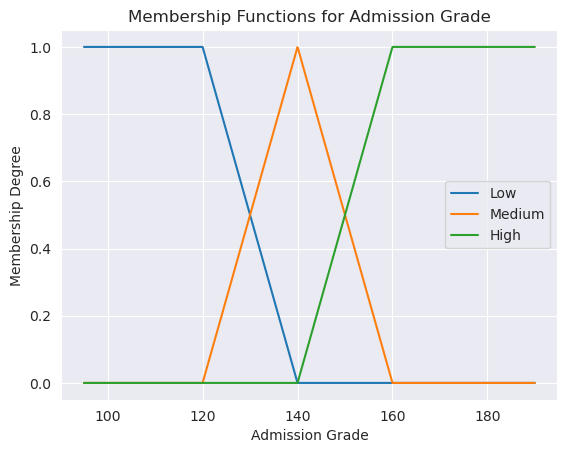

In [80]:
# Define membership functions for 'Admission grade'
admission_grade_low = lambda x: triangular_membership(x, 95, 120, 140, boundary = 'left')
admission_grade_medium = lambda x: triangular_membership(x, 120, 140, 160)
admission_grade_high = lambda x: triangular_membership(x, 140, 160, 190, boundary = 'right')

# Plot membership functions for 'Admission grade'
x = np.linspace(95, 190, 1000)
plt.plot(x, [admission_grade_low(val) for val in x], label='Low')
plt.plot(x, [admission_grade_medium(val) for val in x], label='Medium')
plt.plot(x, [admission_grade_high(val) for val in x], label='High')
plt.title('Membership Functions for Admission Grade')
plt.xlabel('Admission Grade')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

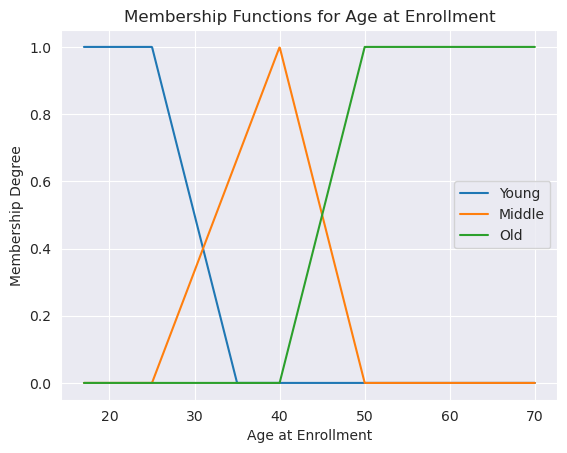

In [93]:
# Define membership functions for 'Age at enrollment'
age_young = lambda x: triangular_membership(x, 15, 25, 35, boundary ='left')
age_middle_aged = lambda x: triangular_membership(x, 25, 40, 50)
age_old = lambda x: triangular_membership(x, 40, 50, 70, boundary ='right')

# Plot membership functions for 'Age at enrollment'
x = np.linspace(17, 70, 1000)
plt.plot(x, [age_young(val) for val in x], label='Young')
plt.plot(x, [age_middle_aged(val) for val in x], label='Middle')
plt.plot(x, [age_old(val) for val in x], label='Old')
plt.title('Membership Functions for Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Membership Degree')
plt.legend()
plt.show

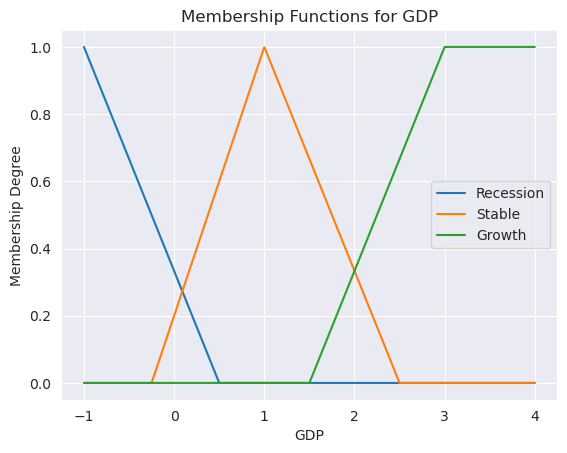

In [97]:
# Define membership functions for 'GDP'
admission_grade_low = lambda x: triangular_membership(x, -4, -1, 0.5, boundary = 'left')
admission_grade_medium = lambda x: triangular_membership(x, -0.25, 1, 2.5)
admission_grade_high = lambda x: triangular_membership(x, 1.5, 3, 4, boundary = 'right')

# Plot membership functions for 'GDP'
x = np.linspace(-1, 4, 1000)
plt.plot(x, [admission_grade_low(val) for val in x], label='Recession')
plt.plot(x, [admission_grade_medium(val) for val in x], label='Stable')
plt.plot(x, [admission_grade_high(val) for val in x], label='Growth')
plt.title('Membership Functions for GDP')
plt.xlabel('GDP')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

In [101]:
# Apply fuzzy membership to training data
X_train_fuzzy = X_train.copy()

X_train_fuzzy['Admission grade_low'] = X_train['Admission grade'].apply(admission_grade_low)
X_train_fuzzy['Admission grade_medium'] = X_train['Admission grade'].apply(admission_grade_medium)
X_train_fuzzy['Admission grade_high'] = X_train['Admission grade'].apply(admission_grade_high)

X_train_fuzzy['Age at enrollment_young'] = X_train['Age at enrollment'].apply(age_young)
X_train_fuzzy['Age at enrollment_middle-aged'] = X_train['Age at enrollment'].apply(age_middle_aged)
X_train_fuzzy['Age at enrollment_old'] = X_train['Age at enrollment'].apply(age_old)

X_train_fuzzy['GDP_low'] = X_train['GDP'].apply(admission_grade_low)
X_train_fuzzy['GDP_medium'] = X_train['GDP'].apply(admission_grade_medium)
X_train_fuzzy['GDP_high'] = X_train['GDP'].apply(admission_grade_high)


In [106]:
display(X_train_fuzzy.head())

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Course_high,Admission grade_low,Admission grade_medium,Admission grade_high,Age at enrollment_young,Age at enrollment_middle-aged,Age at enrollment_old,GDP_low,GDP_medium,GDP_high
3383,4,7,1,9147,1,3,130.0,1,19,1,...,0,0,0,1,0.0,0.666667,0.0,0.00,0.320000,0.346667
2840,1,39,1,9085,1,1,130.0,1,37,37,...,0,0,0,1,1.0,0.000000,0.0,0.00,0.320000,0.346667
564,1,1,6,9070,1,6,119.0,1,1,1,...,0,0,0,1,1.0,0.000000,0.0,0.00,0.506667,0.160000
1786,2,39,1,9238,1,19,133.1,1,37,37,...,0,0,0,1,0.0,0.800000,0.2,1.00,0.000000,0.000000
3900,1,1,3,9500,1,1,142.0,1,37,38,...,0,0,0,1,1.0,0.000000,0.0,0.12,0.456000,0.000000


In [68]:
import numpy as np
from collections import defaultdict
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming X_train and y_train are already defined as pandas DataFrame and Series
# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)


In [98]:

# Step 1: Feature Selection using Mutual Information
# Identify discrete features (categorical or binary with <= 10 unique values)
discrete_features = [col for col in X_train.columns if X_train[col].nunique() <= 10]
discrete_mask = [col in discrete_features for col in X_train.columns]

# Compute mutual information between features and target
mi = mutual_info_classif(X_train, y_train_encoded, discrete_features=discrete_mask, random_state=42)

# Create a DataFrame with feature names and their mutual information scores
mi_df = pd.DataFrame({'feature': X_train.columns, 'mi': mi})
selected_features = mi_df.sort_values('mi', ascending=False)['feature'][:10].tolist()
print("Selected features:", selected_features)


Selected features: ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (evaluations)', 'Tuition fees up to date', 'Curricular units 1st sem (evaluations)', 'Course', 'Curricular units 2nd sem (enrolled)', 'Scholarship holder']


/usr/lib/python3/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/sklearn/metri

In [70]:

# Step 2: Define Fuzzy Sets
# Differentiate between binary and continuous features
binary_features = [feature for feature in selected_features if X_train[feature].nunique() == 2]
continuous_features = [feature for feature in selected_features if feature not in binary_features]

# Define triangular membership function
def triangular_membership(x, a, b, c):
    if x <= a or x >= c:
        return 0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x < c:
        return (c - x) / (c - b)
    return 0


In [71]:

# Create triangular membership functions for continuous features
def create_triangular_mfs(min_val, max_val):
    a = min_val
    c = max_val
    b = (a + c) / 2
    low = lambda x: triangular_membership(x, a, a, b)
    medium = lambda x: triangular_membership(x, a, b, c)
    high = lambda x: triangular_membership(x, b, c, c)
    return {'low': low, 'medium': medium, 'high': high}


In [72]:

# Initialize fuzzy sets dictionary
fuzzy_sets = {}
for feature in selected_features:
    if feature in binary_features:
        v0, v1 = sorted(X_train[feature].unique())
        fuzzy_sets[feature] = {
            f'is_{v0}': lambda x, v=v0: 1 if x == v else 0,
            f'is_{v1}': lambda x, v=v1: 1 if x == v else 0
        }
    else:  # Continuous feature
        min_val = X_train[feature].min()
        max_val = X_train[feature].max()
        fuzzy_sets[feature] = create_triangular_mfs(min_val, max_val)


In [73]:

# Step 3: Extract Fuzzy Rules using Wang-Mendel Method
rule_weights = defaultdict(lambda: defaultdict(float))

# Iterate over each training sample
for index, row in X_train.iterrows():
    antecedent = []
    memberships = []
    for feature in selected_features:
        mfs = fuzzy_sets[feature]
        # Find the fuzzy set with the highest membership degree
        max_mf = max(mfs, key=lambda mf: mfs[mf](row[feature]))
        antecedent.append(max_mf)
        memberships.append(mfs[max_mf](row[feature]))
    # Compute the rule weight as the product of membership degrees
    weight = np.prod(memberships)
    consequent = y_train[index]
    # Accumulate weights for each (antecedent, consequent) pair
    rule_weights[tuple(antecedent)][consequent] += weight


In [74]:

# Select the best consequent for each antecedent
rules = {}
for antecedent, consequents in rule_weights.items():
    best_consequent = max(consequents, key=consequents.get)
    rules[antecedent] = best_consequent



In [75]:
# Output results
print(f"Number of extracted rules: {len(rules)}")
print("\nSample rules:")
for i, (antecedent, consequent) in enumerate(list(rules.items())[:5]):
    rule_str = " AND ".join([f"{selected_features[j]} is {antecedent[j]}" for j in range(len(selected_features))])
    print(f"Rule {i+1}: IF {rule_str} THEN {consequent}")

Number of extracted rules: 280

Sample rules:
Rule 1: IF Curricular units 2nd sem (approved) is low AND Curricular units 2nd sem (grade) is low AND Curricular units 1st sem (approved) is low AND Curricular units 1st sem (grade) is low AND Curricular units 2nd sem (evaluations) is low AND Tuition fees up to date is is_1 AND Curricular units 1st sem (evaluations) is low AND Course is high AND Curricular units 2nd sem (enrolled) is low AND Scholarship holder is is_0 THEN Dropout
Rule 2: IF Curricular units 2nd sem (approved) is low AND Curricular units 2nd sem (grade) is medium AND Curricular units 1st sem (approved) is low AND Curricular units 1st sem (grade) is medium AND Curricular units 2nd sem (evaluations) is medium AND Tuition fees up to date is is_1 AND Curricular units 1st sem (evaluations) is medium AND Course is high AND Curricular units 2nd sem (enrolled) is medium AND Scholarship holder is is_1 THEN Enrolled
Rule 3: IF Curricular units 2nd sem (approved) is medium AND Curricu

In [76]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'y_pred_test' and 'y_test' are available from previous steps
# 'le' is the LabelEncoder used for encoding class labels

# Decode test labels if necessary
y_test_decoded = le.inverse_transform(y_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
class_names = le.classes_

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
print("Confusion matrix saved as 'confusion_matrix.png'")

ValueError: y contains previously unseen labels: ['Dropout' 'Enrolled' 'Graduate']

In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np

# Placeholder data and functions (replace with actual data and logic from your project)
selected_features = ['feature1', 'feature2', 'feature3']  # Example features
continuous_features = ['feature1', 'feature2']  # Features with continuous ranges
binary_features = ['feature3']  # Features that are binary (0 or 1)
X_train = {  # Example training data ranges
    'feature1': np.array([0, 10]),
    'feature2': np.array([0, 100]),
    'feature3': np.array([0, 1])
}
le = type('LabelEncoder', (), {'classes_': ['Class A', 'Class B']})()  # Dummy label encoder

def predict_fuzzy(input_values):
    """
    Perform fuzzy inference based on input values.
    Replace this with your actual fuzzy inference logic.
    """
    # Dummy prediction for demonstration
    return np.random.choice(le.classes_)

def validate_inputs(inputs):
    """
    Validate input values to ensure they are within expected ranges.
    """
    for feature, value in inputs.items():
        if feature in continuous_features:
            min_val = X_train[feature].min()
            max_val = X_train[feature].max()
            if not (min_val <= value <= max_val):
                return False, f"{feature} must be between {min_val} and {max_val}"
        elif feature in binary_features:
            if value not in [0, 1]:
                return False, f"{feature} must be 0 or 1"
    return True, ""

def on_predict():
    """
    Handle the predict button click event.
    """
    inputs = {}
    for feature, entry in entry_fields.items():
        try:
            value = float(entry.get())
            if feature in binary_features:
                value = int(value)
            inputs[feature] = value
        except ValueError:
            messagebox.showerror("Invalid Input", f"Invalid value for {feature}")
            return

    is_valid, error_msg = validate_inputs(inputs)
    if not is_valid:
        messagebox.showerror("Invalid Input", error_msg)
        return

    prediction = predict_fuzzy(inputs)
    result_label.config(text=f"Predicted Class: {prediction}")

# Create the main window
root = tk.Tk()
root.title("Fuzzy Inference System")
root.geometry("400x600")
root.configure(bg="#f0f0f0")

# Create instructions label
instructions = tk.Label(root, text="Enter feature values and click Predict", bg="#f0f0f0", font=("Arial", 12))
instructions.grid(row=0, column=0, columnspan=2, pady=10)

# Create labels and entry fields for each selected feature
entry_fields = {}
for i, feature in enumerate(selected_features, start=1):
    label = tk.Label(root, text=feature, bg="#f0f0f0", font=("Arial", 10))
    label.grid(row=i, column=0, padx=10, pady=5, sticky='w')
    entry = tk.Entry(root, font=("Arial", 10))
    entry.grid(row=i, column=1, padx=10, pady=5)
    entry_fields[feature] = entry

# Create predict button
predict_button = tk.Button(root, text="Predict", command=on_predict, bg="#4CAF50", fg="white", font=("Arial", 12))
predict_button.grid(row=len(selected_features)+1, column=0, columnspan=2, pady=20)

# Create result label
result_label = tk.Label(root, text="Predicted Class: ", bg="#f0f0f0", font=("Arial", 12, "bold"))
result_label.grid(row=len(selected_features)+2, column=0, columnspan=2, pady=10)

# Run the GUI
root.mainloop()